In [1]:
from __future__ import division, print_function
import numpy, pylab, math
import icecube
from icecube import dataio
from icecube import dataclasses
from icecube import CascadeVariables
import os
%matplotlib inline
pylab.rc('xtick', labelsize=22) 
pylab.rc('ytick', labelsize=22) 

In [2]:
gcd=dataio.I3File("/data/sim/IceCube/2011/filtered/level2/neutrino-generator/10099/00000-00999/GeoCalibDetectorStatus_IC86.55697_corrected_V2.i3.gz")


In [3]:
gcd=dataio.I3File("/data/sim/IceCube/2011/filtered/level2/neutrino-generator/10099/00000-00999/GeoCalibDetectorStatus_IC86.55697_corrected_V2.i3.gz")
gcd.rewind()
fr=gcd.pop_frame()
geo=fr.Get("I3Geometry")


In [9]:
NFiles=10
sigFilesI3=[]
sigDir="/data/user/dxu/batch/myjobs/EHE/level4a/cc_nutau/10099/outfile_reOP/update_07122016/"
sigFiles=os.listdir(sigDir)
for i in sigFiles:
    if(i.find(".i3.bz2")>0):
        sigFilesI3.append(i)

bgFilesI3=[]
bgDir="/data/user/dxu/batch/myjobs/EHE/level4a/nc_nutau/10099/outfile_reOP/update_07122016/"
bgFiles=os.listdir(bgDir)
for i in bgFiles:
    if(i.find(".i3.bz2")>0):
        bgFilesI3.append(i)


sigFilesI3=sigFilesI3[0:NFiles]
#bgFilesI3=bgFilesI3[0:NFiles]

In [5]:
import cPickle
KernelsFile=open("DOMKernelsLong.dat",'r')
WFDictionary=cPickle.load(KernelsFile)
KernelsFile.close()

In [6]:
cm=pylab.get_cmap("coolwarm")

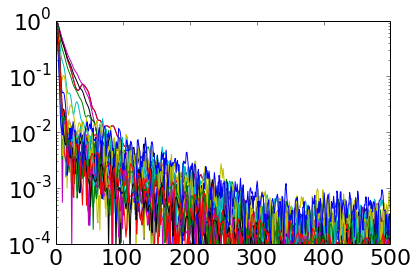

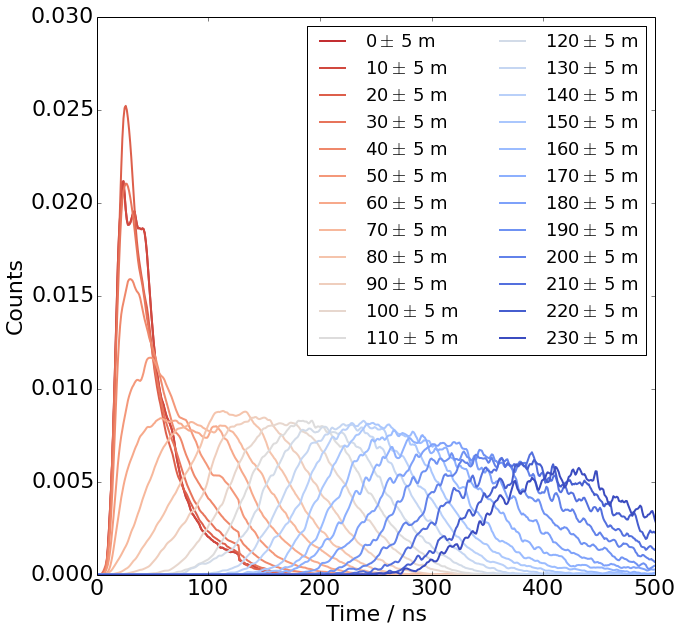

In [7]:
KernelDictionary={}

for key in WFDictionary.keys():
    SignalKernel=numpy.fft.rfft(WFDictionary[key])
    KernelDictionary[key]=SignalKernel
    pylab.plot(numpy.abs(KernelDictionary[key]))
    #pylab.plot(Filter)
pylab.semilogy()
pylab.ylim(1e-4,1)
pylab.xlim(0,500)
pylab.show()

pylab.figure(figsize=(10,10))
count=0
for key in sorted(WFDictionary.keys()):
    count=count+1
    pylab.plot(WFDictionary[key],label=str(key)+"$\pm$ 5 m",color=cm(1.-(count*1./len(WFDictionary.keys()))),linewidth=2)
pylab.xlim(0,500)
pylab.ylim(0,0.03)
pylab.xlabel("Time / ns",fontsize=22)
pylab.ylabel("Counts",fontsize=22)
pylab.legend(loc='upper right',ncol=2,fontsize=18)
#pylab.semilogy()
pylab.savefig("Kernels.png")


pylab.show()   



In [10]:
FilesToLoad=1
FileList=bgFilesI3[0:FilesToLoad]
FileDir=bgDir

Count=0    
NoCascades=0
Distances=[]
Waveforms=[]
Energies=[]
EnergiesTrue=[]
Times=[]

EnergyLimLow=5e4
EnergyLimHigh=1e6

for bgFile in FileList:
    Count=Count+1
    print("opening "+bgFile+",  "+str(Count)+" of " + str(len(bgFilesI3)))
    bgFile=dataio.I3File(FileDir+bgFile)
    bgFile.rewind()
    while(bgFile.more()):
        #pop a frame
        fr=bgFile.pop_physics()
        #grab the weight dict and event weight
        WeightDict=fr.Get("I3MCWeightDict")
        if( WeightDict["PrimaryNeutrinoEnergy"]<EnergyLimLow) or (WeightDict["PrimaryNeutrinoEnergy"]>EnergyLimHigh):    
            continue
        EnergiesTrue.append(WeightDict["PrimaryNeutrinoEnergy"])
        Weight=(365*24*3600)*1.0e-8*pow(WeightDict["PrimaryNeutrinoEnergy"], -2)*WeightDict["OneWeight"]/(WeightDict["NEvents"]*len(sigFilesI3))

        #Find the cascade center
        if not fr.Has("CascadeLlhVertexFit"):
            NoCascadesBG=NoCascadesBG+1
            continue
        csc=fr.Get('CascadeLlhVertexFit')
        cscpos=csc.pos

        #Get the waveforms
#        rd=fr.Get('In')
        wf=fr.Get('CalibratedWaveformsHLCATWD')
        DistancesThisEvt=[]
        WaveformsThisEvt=[]
        TimesThisEvt=[]
        Energies.append(csc.energy)

        for om, wf_series in wf:
            for w in wf_series:
                if(w.status==0):
                    DOMPos=geo.omgeo[om].position
                    DistancesThisEvt.append((cscpos-DOMPos).r)
                    WaveformsThisEvt.append(w.waveform)
                    TimesThisEvt.append(w.time)
                    break
        Waveforms.append(WaveformsThisEvt)
        Distances.append(DistancesThisEvt)
        Times.append(TimesThisEvt)

opening dp_Level4a_nugen_nutau_IC86.2011.010099.000131.i3.bz2,  1 of 999


In [20]:
MaxDist=150
Top=100
Count=0
PlotThem=True
AllSums=numpy.zeros_like(Waveforms[0][0])
for i in range(0, len(Energies)):

    for j in range(0,len(Distances[i])):
        if Distances[i][j]<MaxDist:
            N+=1
            for distkey in KernelDictionary.keys():
                if Distances[i][j]>distkey:
                    break
            Kernel=KernelDictionary[distkey]
            TemplateMatch=MakeTemplateMatch(Waveforms[i][j],Kernel)
            AllSums+=TemplateMatch


128 501
0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 0
17 0
18 0
19 0
20 0
21 0
22 0
23 0
24 0
25 0
26 0
27 0
28 0
29 0
30 0
31 0
32 0
33 0
34 0
35 0
36 0
37 0
38 0
39 0
40 0
41 0
42 0
43 0
44 0
45 0
46 0
47 0
48 0
49 0
50 0
51 0
52 0
53 0
54 0
55 0
56 0
57 0
58 0
59 0
60 0
61 0
62 0
63 0
64 0
65 0
66 0
67 0
68 0
69 0
70 0
71 0
72 0
73 0
74 0
75 0
76 0
77 0
78 0
79 0
80 0
81 0
82 0
83 0
84 0
85 0
86 0
87 0
88 0
89 0
90 0
91 0
92 0
93 0
94 0
95 0
96 0
97 0
98 0
99 0
100 0
101 0
102 0
103 0
104 0
105 0
106 0
107 0
108 0
109 0
110 0
111 0
112 0
113 0
114 0
115 0
116 0
117 0
118 0
119 0
120 0
121 0
122 0
123 0
124 0
125 0
126 0
127 0
128 0


IndexError: Index out of range

In [19]:
def MakeTemplateMatch(Waveform,Kernel):
    print(len(Waveform),len(Kernel))
    buffers=[]
    for istart in range(0,len(Waveform)):
        thebuffer=0
        for j in range(istart,len(Kernel)):
            print(j,istart)
            thebuffer+=Waveform[j-istart]*Kernel[j]
        buffers.append(thebuffer) 
    return buffers

In [11]:
MaxDist=150
Top=100
Count=0
PlotThem=True
AllSums=numpy.zeros(128,dtype='float')
for i in range(0, len(Energies)):
    N=0
    SumForm=numpy.zeros(128,dtype='float')
    FreqSum=numpy.zeros(65,dtype='complex')
    for j in range(0,len(Distances[i])):
        if Distances[i][j]<MaxDist:
            N+=1
            for distkey in KernelDictionary.keys():
                if Distances[i][j]>distkey:
                    break
            Kernel=KernelDictionary[distkey]
            Filter=numpy.abs(Kernel) / pow(numpy.abs(Kernel)**2+(2e-3)**2,0.5) 
            FreqSum+=numpy.fft.rfft(Waveforms[i][j])*Filter/Kernel
            
        SumForm=numpy.fft.irfft(FreqSum)
    print(N)
    AllSums+=SumForm/Energies[i]
    if(PlotThem):
        pylab.figure(figsize=(5,5))    
        pylab.plot(SumForm/Energies[i],label=Count)
        pylab.xlabel("Time")
        pylab.xlim(-10,150)
        pylab.title("Energy = " + str(EnergiesTrue[i]/1000.) + " TeV")
    Count=Count+1
    if Count==Top:
        break
        

            

ValueError: operands could not be broadcast together with shapes (65) (501) 

In [ ]:
pylab.figure(figsize=(5,5)) 
pylab.plot(AllSums,label=Count)
pylab.xlabel("Time")
pylab.ylabel("Deconvolved form")
pylab.xlim(-10,150)
    

In [ ]:
pylab.hist(Times[0]-numpy.average(Times[0]))

In [ ]:
len(Times[1])

In [ ]:
w.bin_width